# Edge detector

This primitive edge detector function works by comparing each pixel with its neighbours.
It works in the following order:

1. imports libraries
2. it opens the image and calculates the number of pixels
3. to prevent extreme run times it reduces the size (and definition) of an image if it's deemed too large
4. it creates an image array and stores its height and width
5. it defines two arrays. One for the vertical edges and one for the horizontal edges. Since there are inherently x-1 vertical borders between pixels     and y-1 horizontal borders between pixels in an image of x by y size, these arrays reflect that
6. a while loop runs to calculate the magnitude of colour difference between adjacent pixels in each row
7. a while loop runs to calculate the magnitude of colour difference between adjacent pixels in each column
8. the two arrays are cropped to the same size and combined so all edges are shown properly
9. the images are output using pyplot

The numbers of each of these stages are found in comments throughout the function

In [7]:
def edgedetect(filedirectory):
    
    #1. importing libraries
    from PIL import Image
    import matplotlib.pyplot as plt
    import numpy as np

    #2. opening image
    image = Image.open(filedirectory)
    pixelnum = image.width*image.height

    #3. run time reduction
    if 0<pixelnum<1000001:
        print("Image processed at full size.")
        new_image = image
    elif pixelnum>1000000:
        print("Image processed at 100th size.")
        new_size = (image.width // 10, image.height // 10)
        new_image = image.resize(new_size, Image.Resampling.LANCZOS)
    elif pixelnum>1000000000000:
        print("Image processed at 10,000th size.")
        new_size = (image.width // 100, image.height // 100)
        new_image = image.resize(new_size, Image.Resampling.LANCZOS)
    else:
        print("image size error")
        new_image = image

    #4. original array set up
    imagearray = np.array(new_image)
    imageshape = imagearray.shape
    imagewidth = imageshape[1]
    imageheight = imageshape[0]

    #5. secondary array set up
    verticalarray = np.full((imageheight,imagewidth-1), 0)
    horizontalarray = np.full((imageheight-1,imagewidth), 0)

    #6. calculating vertical edges
    y = 0
    print("Vertical edge processing. Please wait. This make take a minute or two.")
    while y < imageheight:
        x = 0
        while x < imagewidth-1:
            current = imagearray[y, x].astype(np.int16)
            nextpix = imagearray[y, x+1].astype(np.int16)
            difference = current - nextpix
            mag = np.linalg.norm(difference)
            verticalarray[y,x] = mag
            verticalarray = np.clip(verticalarray, 0, 255).astype(np.uint8)
            x = x + 1
        y = y + 1

    #7. calculating horizontal edges
    y = 0
    print("Horizontal edge processing. Please wait. This make take a minute or two.")
    while y < imageheight-1:
        x = 0
        while x < imagewidth:
            current = imagearray[y, x].astype(np.int16)
            nextpix = imagearray[y+1, x].astype(np.int16)
            difference = current - nextpix
            mag = np.linalg.norm(difference)
            horizontalarray[y,x] = mag
            horizontalarray = np.clip(horizontalarray, 0, 255).astype(np.uint8)
            x = x + 1
        y = y + 1

    #8. cropping and combining arrays
    croppedvert = verticalarray[:-1,:]
    croppedhorz = horizontalarray[:,:-1]
    comb = (croppedvert.astype(np.int16) + croppedhorz.astype(np.int16))
    comb = np.clip(comb, 0, 255).astype(np.uint8)

    #9. displaying the images
    imgvert = Image.fromarray(verticalarray, mode='L')
    imgvert.save("vertical edges.jpg")
    imghorz = Image.fromarray(horizontalarray, mode='L')
    imghorz.save("horizontal edges.jpg")
    imgcomb = Image.fromarray(comb, mode='L')
    imgcomb.save("combined edges.jpg")
    
    plt.figure(figsize=(20,5))

    #first image: vertical edges
    plt.subplot(1, 3, 1)
    plt.imshow(imgvert)
    plt.axis('off')
    plt.title('Vertical edges')

    #second image: horizontal edges
    plt.subplot(1, 3, 2)
    plt.imshow(imghorz)
    plt.axis('off')
    plt.title('Horizontal edges')

    #third image: combined edges
    plt.subplot(1,3,3)
    plt.imshow(imgcomb)
    plt.axis('off')
    plt.title('Combined edges')
    
    plt.show()
    
    return 'complete'

# Calling the function

Here you can call the function. There is an image included in the folder that this notebook came in called "sample image" that can be used or you can specify your own image. If using your own image there are a few things to consider:
1. Either call the files entire directory or make sure the image is in the directory as this notebook. If you are still having trouble getting the        program to access the correct file please scroll down to the next section of this notebook.
2. When calling a directory make sure to use only '/' rather than '\'. If you copy the directory from file explorer it may often use '\' so this may      need to be changed.
3. Make sure you use the correct file type at the end of the file name.
4. Only use acceptable file types. These include .jpg .jpeg .png .bmp .gif .tif .tiff .webp    It is important to note that if your file type is a gif    the function defined above will only handle the first frame of the gif.

Image processed at 100th size.
Vertical edge processing. Please wait. This make take a minute or two.
Horizontal edge processing. Please wait. This make take a minute or two.


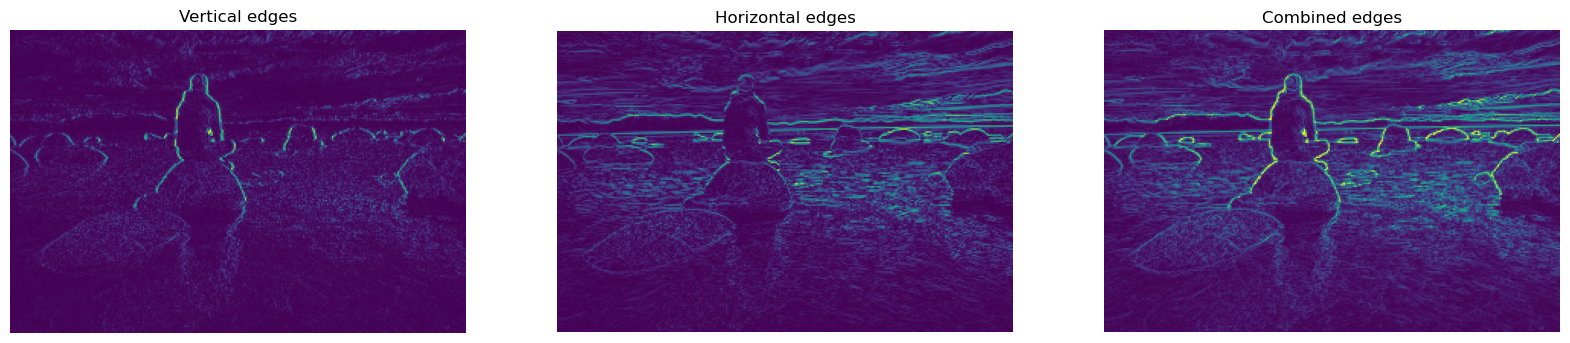

'complete'

In [8]:
edgedetect("sample image.jpg")

# Troubleshooting

This notebook has not been created with the intention of the code being distributed to users who do not understand it or know how to use it. As such there is nothing here to 'user-proof' the program. Hence if it is called on in an unintended way it is likely to malfunction.

If you are having trouble getting the notebook to access the correct file please read here. If you are having major issues I would recommend using the entire file directory. However, if your file is in the same directory as this notebook and you only intend to use the file name, such as 'sample.jpeg' then this may help. The cell below can be run to tell you where the notebook currently thinks it is. This may not be the same as where it actually is as if you open the notebook, then move it, it may still run from the original position. If this is the case, please close and re-open the notebook and hopefully this will solve the issue. Another issue that may occur with finding the file is if it is within a folder, and the folder in turn is in the same directory as the notebook. If this is the case you can use 'examplefolder/examplefile.jpg' to specify the location of the file, or you can use the entire file directory. Hopefully this helps.

In [3]:
import os
print(os.getcwd())

C:\Users\User\python\Edge detector
